<a href="https://colab.research.google.com/github/PlacementGuide1/PythonCourse/blob/main/Lecture6_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Persistence](#scrollTo=Jc4Plkbvex0i)

>[Opening files](#scrollTo=zbvkXb9hfYy1)

>[Text files and lines](#scrollTo=jbtnkgbYjEpO)

>[Reading files](#scrollTo=Dj9U7XlrloKf)

>[SEARCHING THROUGH A FILE](#scrollTo=eW0IwLVOqFBY)

>[Searching through a file](#scrollTo=ZBBNmAqFwhHo)

>[Letting the user choose the file name](#scrollTo=1CUxaH_57HZZ)

>[Using try, except, and open](#scrollTo=XxoO3M687llp)

>[Writing files](#scrollTo=Cj49xtcI9pGt)

>[Debugging](#scrollTo=AHHsxk7G-xWP)



#Persistence

So far, we have learned how to write programs and communicate our intentions to
the Central Processing Unit using conditional execution, functions, and iterations.
We have learned how to create and use data structures in the Main Memory. The
CPU and memory are where our software works and runs. It is where all of the
“thinking” happens.
But if you recall from our hardware architecture discussions, once the power is
turned off, anything stored in either the CPU or main memory is erased. So up to
now, our programs have just been transient fun exercises to learn Python.


#Opening files

When we want to read or write a file (say on your hard drive), we first must
open the file. Opening the file communicates with your operating system, which
knows where the data for each file is stored. When you open a file, you are
asking the operating system to find the file by name and make sure the file exists.
In this example, we open the file mbox.txt, which should be stored in the same
folder that you are in when you start Python

In [ ]:
fhand = open('/content/sample_data/Lecture6/mbox-short.txt')
print(fhand)

<_io.TextIOWrapper name='/content/sample_data/Lecture6/mbox-short.txt' mode='r' encoding='UTF-8'>


f the open is successful, the operating system returns us a file handle. The file
handle is not the actual data contained in the file, but instead it is a “handle” that
we can use to read the data. You are given a handle if the requested file exists and
you have the proper permissions to read the file.

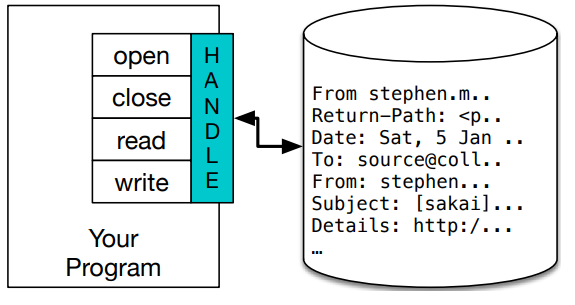

In [ ]:
fhand = open('/content/Lecture6/mbox-short.txt')

There are four different methods (modes) for opening a file:

"r" - Read - Default value. Opens a file for reading, error if the file does not exist

"a" - Append - Opens a file for appending, creates the file if it does not exist

"w" - Write - Opens a file for writing, creates the file if it does not exist

"x" - Create - Creates the specified file, returns an error if the file exists

In addition you can specify if the file should be handled as binary or text mode

"t" - Text - Default value. Text mode

"b" - Binary - Binary mode (e.g. images)

Because "r" for read, and "t" for text are the default values, you do not need to specify them.

#Text files and lines

A text file can be thought of as a sequence of lines, much like a Python string can
be thought of as a sequence of characters.

In Python, we represent the newline character as a backslash-n `\n` in string constants.
Even though this looks like two characters, it is actually a single character. When we look at the variable by entering “stuff” in the interpreter, it shows us the \n in the string, but when we use print to show the string, we see the string broken into two lines by the newline character.

In [ ]:
stuff = 'Hello\nWorld!'
print(stuff)
stuff = 'X\nY'
print(stuff)
len(stuff)

Hello
World!
X
Y


3

## Reading files
While the file handle does not contain the data for the file, it is quite easy to construct a for loop to read through and count each of the lines in a file:



In [ ]:

fhand = open('/content/sample_data/Lecture6/output.txt', "r")
count = 0
for line in fhand:
  print(line)
  count = count + 1
print('Line Count:', count)

This here's the wattle,

the emblem of our land.

This here's the wattle,

the emblem of our land.

This here's the wattle,

the emblem of our land.

This here's the wattle,

the emblem of our land.

Line Count: 8


In [ ]:
fhand = open('/content/sample_data/Lecture6/output.txt')
inp = fhand.read()
print(type(inp))
print(len(inp))
print(inp[:20])

<class 'str'>
192
This here's the watt



#Searching through a File

When the file is read in this manner, all the characters including all of the lines
and newline characters are one big string in the variable inp. It is a good idea
to store the output of read as a variable because each call to read exhausts the
resource:

In [ ]:
fhand = open('/content/Lecture6/mbox-short.txt')
print(len(fhand.read()))
print(len(fhand.read()))

78
0


When you are searching through data in a file, it is a very common pattern to read
through a file, ignoring most of the lines and only processing lines which meet a
particular condition.


In [ ]:
fhand = open('/content/sample_data/Lecture6/output.txt')
for line in fhand:
  if line.startswith('From:'):
     print(line)

From: Lucknow



We could use line slicing to print all but the last character, but a simpler approach
is to use the rstrip method which strips whitespaces from the right side of a string
as follows:



In [ ]:
fhand = open('/content/sample_data/Lecture6/mbox-short.txt')
for line in fhand:
  line = line.rstrip()
  if line.startswith('From:'):
    print(line)

From: Lucknow


The basic idea of the search loop is that you are
looking for “interesting” lines and effectively skipping “uninteresting” lines.


In [ ]:
fhand = open('/content/Lecture6/mbox-short.txt')
for line in fhand:
  line = line.rstrip()
  if not line.startswith('From:'):
    continue
  print(line)

From: Lucknow


We can use the find string method to simulate a text editor search that finds lines
where the search string is anywhere in the line.


In [ ]:
fhand = open('/content/Lecture6/mbox-short.txt')
for line in fhand:
  line = line.rstrip()
  if line.find('@uct.ac.za') == -1: continue
  print(line)


@uct.ac.za


#Letting the user choose the file name

We really do not want to have to edit our Python code every time we want to
process a different file. It would be more usable to ask the user to enter the file
name string each time the program runs so they can use our program on different
files without changing the Python code.


In [ ]:
fname = input('Enter the file name: ')
fhand = open(fname)
count = 0
for line in fhand:
  if line.startswith('Subject:'):
    count = count + 1
  print('There were', count, 'subject lines in', fname)


Enter the file name: /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt
There were 0 subject lines in /content/sample_data/Lecture6/output.txt


#Using try, except, and open

 Users will eventually do every possible thing they can do to break
your programs, either mistakenly or with malicious intent.


In [ ]:
fname = input('Enter the file name: ')
try:
  fhand = open(fname)
except:
  print('File cannot be opened:', fname)
else:
  count = 0
  for line in fhand:
    if line.startswith('Subject:'):
      count = count + 1
    print('There were', count, 'subject lines in', fname)
finally:
  fhand.close()
  exit()


Enter the file name:    exit()
File cannot be opened:    exit()


#Writing files

To write a file, you have to open it with mode “w” as a second parameter:


In [ ]:
fout = open('/content/sample_data/Lecture6/output.txt', 'a')
print(fout)

<_io.TextIOWrapper name='/content/sample_data/Lecture6/output.txt' mode='a' encoding='UTF-8'>


The write method of the file handle object puts data into the file, returning the
number of characters written. The default write mode is text for writing (and
reading) strings.


In [ ]:
line1 = "This here's the wattle,\n"
fout.write(line1)

24

Again, the file object keeps track of where it is, so if you call write again, it adds
the new data to the end.The print statement
automatically appends a newline, but the write method does not add the newline
automatically.



In [ ]:
fout.flush()
line2 = 'the emblem of our land.\n'
fout.write(line2)

24

#File Close 

When you are done writing, you have to close the file to make sure that the last bit of data is physically written to the disk so it will not be lost if the power goes off.

In [ ]:
fout.close()

#Debugging

When you are reading and writing files, you might run into problems with whitespace.


In [ ]:
s = '1 2\t 3\n 4'
print(s)


The built-in function repr can help. It takes any object as an argument and
returns a string representation of the object. For strings, it represents whitespace
characters with backslash sequences:


In [ ]:
print(repr(s))